# Census-Income-Prediction

* 다양한 특성을 가진 사람들의 소득이 50k 이상인지 아닌지를 예측하기 위한 데이터셋

* 데이터셋은 Kaggle의 Adult census income dataset을 사용하며, 32561개의 행과 15개의 특성으로 구성되어 있으며, <a href="https://www.kaggle.com/uciml/adult-census-income">링크</a>에서 다운로드 가능

* 데이터셋에는 레이블이 포함되어 있으며, 이 레이블을 예측해야 함

| Column ID |  Column Name   | Data type | Values type |         Description          |
| :-------: | :------------: | :-------: | :---------: | :--------------------------: |
|     0     |      age       |   int64   |  Continous  |        Age of person         |
|     1     |   workclass    |  object   |  Discrete   |     Workclass of person      |
|     2     |     fnlwgt     |   int64   |  Continous  |         Final weight         |
|     3     |   education    |  object   |  Discrete   |  Education Degree of person  |
|     4     | education.num  |   int64   |  Continous  | Number of years of education |
|     5     | marital.status |  object   |  Discrete   |   Marital status of person   |
|     6     |   occupation   |  object   |  Discrete   |     Occupation of person     |
|     7     |  relationship  |  object   |  Discrete   |    Relationship of person    |
|     8     |      race      |  object   |  Discrete   |        Race of person        |
|     9     |      sex       |  object   |  Discrete   |        Sex of person         |
|    10     |  capital.gain  |   int64   |  Continous  |    Capital gain of person    |
|    11     |  capital.loss  |   int64   |  Continous  |    Capital loss of person    |
|    12     | hours.per.week |   int64   |  Continous  |   Number of hours per week   |
|    13     | native.country |  object   |  Discrete   |   Native country of person   |
|    14     |     income     |  object   |  Discrete   |  Income category of person   |

## Step 0: 라이브러리 및 데이터셋 로드

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 데이터 불러오기
dataset = pd.read_csv('adult.csv')

## Step 1: 데이터셋 관찰

In [ ]:
# 데이터셋의 형태를 확인합니다. 첫 5개의 데이터를 출력
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [ ]:
# Shape of dataset
print('Rows: {} Columns: {}'.format(dataset.shape[0], dataset.shape[1]))

Rows: 32561 Columns: 15


In [ ]:
# Features data-type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


#### Problem 1

1) 데이터셋의 행의 수를 출력해주세요.  
2) 결측치가 있는지 확인하고, 있다면 어떤 특성에 결측치가 얼마나 있는지 확인해보세요. (비율로 표현)  
3) 결측치가 있다면, 결측치를 처리해주세요. (결측치가 있는 행 삭제)  
4) 삭제된 후 데이터셋의 행의 수를 출력해주세요.  
5) 타겟 변수인 income의 분포를 확인해주세요.

#### Solution 1

In [ ]:
# 1-1 데이터셋의 행의 수를 출력해주세요.
len(dataset)

32561

In [ ]:
# 1-2 결측치가 있는지 확인하고, 있다면 어떤 특성에 결측치가 얼마나 있는지 확인해보세요. (비율로 표현)

# 결측치 확인 (nan/null)
round((dataset.isnull().sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age               0.0 %
workclass         0.0 %
fnlwgt            0.0 %
education         0.0 %
education.num     0.0 %
marital.status    0.0 %
occupation        0.0 %
relationship      0.0 %
race              0.0 %
sex               0.0 %
capital.gain      0.0 %
capital.loss      0.0 %
hours.per.week    0.0 %
native.country    0.0 %
income            0.0 %
dtype: object

In [ ]:
# 1-2 결측치가 있는지 확인하고, 있다면 어떤 특성에 결측치가 얼마나 있는지 확인해보세요. (비율로 표현)

# 결측치 확인 (?)
round((dataset.isin(['?']).sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [ ]:
# 1-3 결측치가 있다면, 결측치를 처리해주세요. (결측치가 있는 행 삭제)

# Replace '?' with NaN
dataset = dataset.replace('?', np.nan)

# Drop rows with missing values
dataset = dataset.dropna()


In [ ]:
# 1-4 삭제된 후 데이터셋의 행의 수를 출력해주세요.
len(dataset)

30162

In [ ]:
# 1-5 타겟 변수인 income의 분포를 확인해주세요.
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

<=50K    75.11 %
>50K     24.89 %
Name: income, dtype: object

#### 관찰 내용

* 데이터셋에는 null/nan으로 표시된 결측치가 없지만, '?'로 표시된 결측치가 있음

* 데이터셋은 불균형하며, 종속 변수 'income'에는 소득이 50k 이하인 값이 75.92%이고, 50k 이상인 값이 24.08%임

## Step 2: Exploratory Data Analysis

### 2.1: 일변량 분석 (Univariate Analysis)

#### Problem 2

1) Income 분포를 막대 그래프로 그려주세요. (좌측 막대: 50k 이하, 우측 막대: 50k 이상)  
2) Age 분포를 히스토그램으로 그려주세요. (빈 개수=20)  
3) 성별의 분포를 가로 막대 그래프로 그려주세요.  
4) Education 분포를 막대 그래프로 그려주세요.  
5) Education Year 분포를 히스토그램으로 그려주세요. (빈 개수=10)  
6) Workclass 분포를 막대 그래프로 그려주세요.  
7) Marital Status 분포를 원형 그래프로 그려주세요. (비율로 표현, 범례 표시, 원판이 그림의 중심에 오도록 조정, 'never-married' 범주를 떨어뜨려 강조, startangle: 10)  
8) Relationship 분포를 도넛 그래프로 그려주세요. (비율로 표현, 범례 표시, 원판이 그림의 중심에 오도록 조정, startangle: 50, donut 내경이 외경의 70%가   되도록 설정)
9) Occupation 분포를 막대 그래프로 그려주세요.  
10) hours per week을 히스토그램으로 그려주세요. (빈 개수=10, x축 범위: 20~80)  


참고사항
- 그래프의 제목, x축 레이블, y축 레이블을 꼭 표시해주세요.
- 막대 그래프의 경우, x축 레이블이 겹치지 않도록 적절히 회전해주세요.
- 그래프가 너무 작아서/커서 보기 어려운 경우, figsize를 조절해주세요.
- 글씨 크기가 너무 작아서/커서 보기 어려운 경우, fontsize를 조절해주세요.
- 필요하다면 범례(legend)를 표시해주세요.

#### Solution 2

"\nincome = dataset['income'].value_counts()\nplt.figure(figsize=(8, 6))\nplt.style.use('bmh')\nsns.barplot(x=income.index, y=income.values)\nplt.title('Distribution of Income')\nplt.xlabel('Income')\nplt.ylabel('Number of people')\nplt.show()\n"

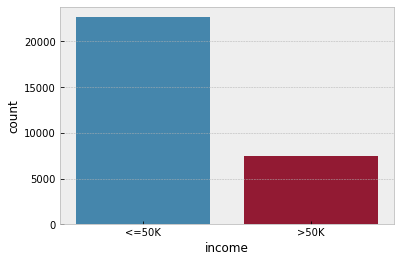

In [ ]:
# 2-1 Income의 빈도 막대 그래프를 그려주세요. (좌측 막대: 50k 이하, 우측 막대: 50k 이상)
sns.countplot(dataset['income'])
#sns.catplot(dataset,x='income',kind='count')
#plt.title('Distribution of Income')

#sns.displot(dataset, x='income',kind='hist')
'''
income = dataset['income'].value_counts()
plt.figure(figsize=(8, 6))
plt.style.use('bmh')
sns.barplot(x=income.index, y=income.values)
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Number of people')
plt.show()
'''

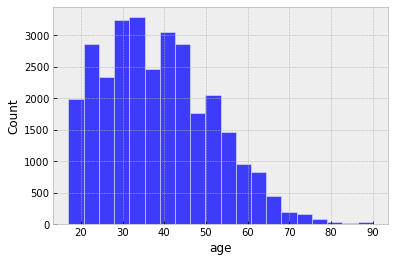

In [ ]:
# 2-2 Age 분포를 히스토그램으로 그려주세요. (빈 개수=20)

sns.histplot(dataset,x='age',bins=20)
#sns.displot(dataset,x='age',kind='hist',bins=20)


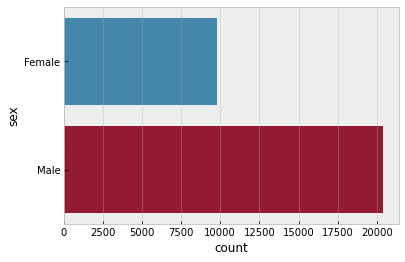

In [ ]:
# 2-3 성별의 빈도 그래프를 막대로 그려주세요.

#sns.histplot(dataset, y='sex',color='green')
#sns.displot(dataset, y='sex',kind='hist')
sns.countplot(data=dataset,y='sex')

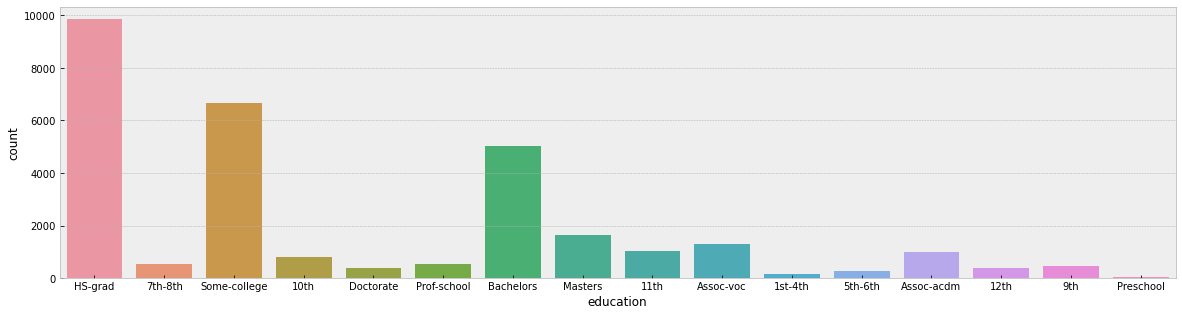

In [ ]:
# 2-4 Education 빈도를 막대 그래프로 그려주세요.
plt.figure(figsize=(20, 5))

sns.countplot(data=dataset,x='education')


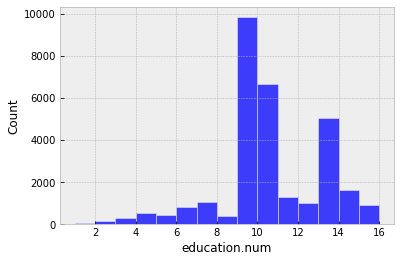

In [ ]:
# 2-5 Education Year 분포를 히스토그램으로 그려주세요. (빈 개수=10)
sns.histplot(dataset, x='education.num',binwidth=1)
#sns.displot(dataset,x='education.num',kind='hist',binwidth=1)


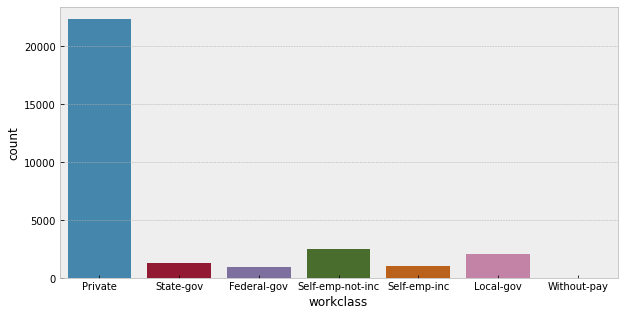

In [ ]:
# 2-6 Workclass 빈도를 막대 그래프로 그려주세요.
plt.figure(figsize=(10, 5))

sns.countplot(data=dataset, x= 'workclass')


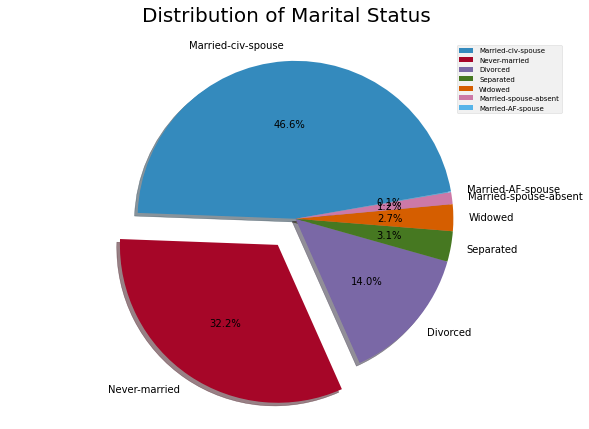

In [ ]:
# 2-7 Marital Status 분포를 원형 그래프로 그려주세요. (비율로 표현, 범례 표시, 원판이 그림의 중심에 오도록 조정, 'never-married' 범주를 떨어뜨려 강조, startangle: 10)

marital = dataset['marital.status'].value_counts()
plt.figure(figsize=(10, 7))

plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Distribution of Marital Status', fontsize=20, pad=20)
plt.axis('equal')
plt.legend(prop={'size': 7})
plt.show()

marital status (결혼 상태) 변수 설명
- married-civ-spouse: marries civilian spouse (민간인 배우자와 결혼)
- never-married: never married (결혼하지 않음)
- divorced: divorced (이혼)
- separated: separated (분리)
- widowed: widowed (사별)
- married-spouse-absent: married spouse absent (결혼 후 직장 등의 사유로 떨어져있음)
- married-AF-spouse: married Armed Forces spouse (군인 배우자와 결혼)

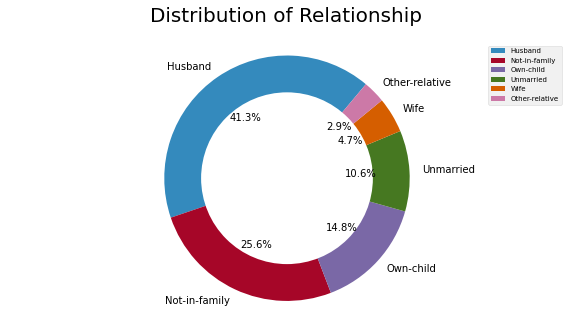

In [ ]:
# 2-8 Relationship 분포를 도넛 그래프로 그려주세요. (비율로 표현, 범례 표시, 원판이 그림의 중심에 오도록 조정, startangle: 50, donut 내경이 외경의 70%가 되도록 설정)

relation = dataset['relationship'].value_counts()

plt.figure(figsize=(10, 5))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')

center_circle = plt.Circle((0, 0), 0.7, fc='white')

fig = plt.gcf() #gcf: get current figure

fig.gca().add_artist(center_circle)

plt.title('Distribution of Relationship', fontsize=20, pad=20)
plt.axis('equal')
plt.legend(prop={'size': 7})
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

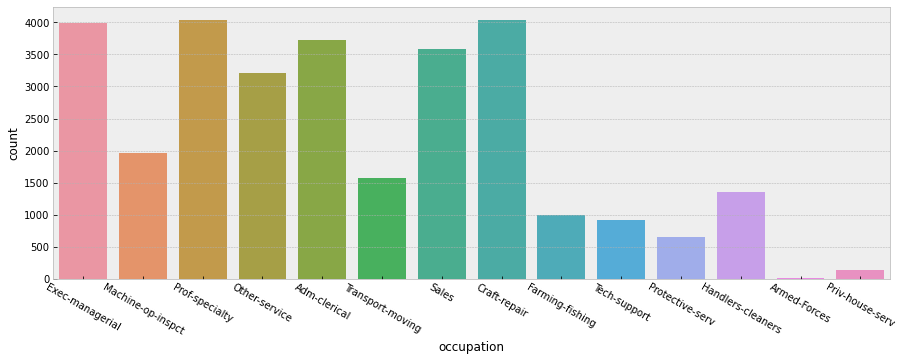

In [ ]:
# 2-9 Occupation 빈도를 막대 그래프로 그려주세요.
plt.figure(figsize=(15, 5))
sns.countplot(data=dataset,x='occupation')
plt.xticks(rotation=-30)



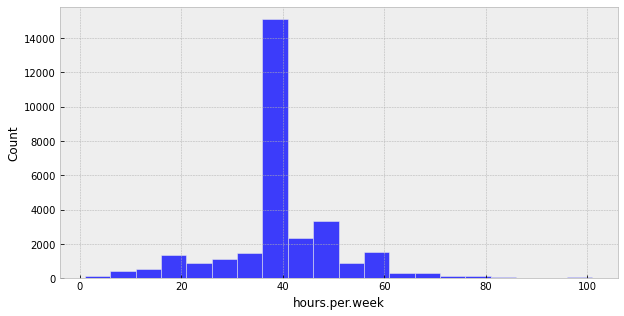

In [ ]:
# 2-10 hours per week을 히스토그램으로 그려주세요. (빈 개수=10, x축 범위: 20~80)
plt.figure(figsize=(10, 5))
sns.histplot(data=dataset,x='hours.per.week',binwidth=5)


### 2.2 이변량 분석 (Bivariate Analysis)

#### Problem 3

1) Age 분포를 Income에 따라 나누어 박스 플롯으로 그려주세요.(좌측: 50k 이하, 우측: 50k 이상)  
2) Age 분포를 Income에 따라 나누어 개수 분포로 그려주세요. (rotation: 90)  
3) Education에 따른 소득 분포를 막대 그래프로 그려주세요.  
4) Years of Education에 따른 소득 분포를 막대 그래프로 그려주세요.  
5) Occupation에 따른 소득 분포를 막대 그래프로 그려주세요.  
6) Age와 Hours per week의 관계를 산점도로 그려주세요. (x축: Age, y축: Hours per week, alpha: 0.3)  
7) Years of Education과 Hours per week의 관계를 Income에 따라 다른 색상으로 표현하는 jointplot로 그려주세요. (x축: Years of Education, y축: Hours per week, alpha: 0.3, hue: income)  


참고사항
- 그래프의 제목, x축 레이블, y축 레이블을 꼭 표시해주세요.
- 막대 그래프의 경우, x축 레이블이 겹치지 않도록 적절히 회전해주세요.
- 그래프가 너무 작아서/커서 보기 어려운 경우, figsize를 조절해주세요.
- 글씨 크기가 너무 작아서/커서 보기 어려운 경우, fontsize를 조절해주세요.
- 필요하다면 범례(legend)를 표시해주세요.

#### Solution 3

Text(0.5, 1.0, 'Boxplot of Age with respect to Income')

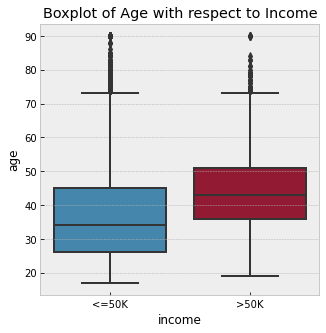

In [ ]:
# 3-1 Age 분포를 Income에 따라 나누어 박스 플롯으로 그려주세요.(좌측: 50k 이하, 우측: 50k 이상)
plt.figure(figsize=(5, 5))
#plt.style.use('bmh')
sns.boxplot(x='income', y='age', data=dataset)
plt.title('Boxplot of Age with respect to Income')


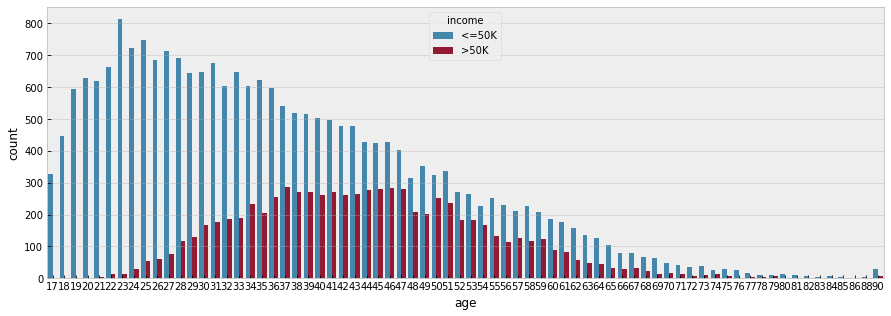

In [ ]:
# 3-2 Age 분포를 Income에 따라 나누어 개수 분포로 그려주세요.
plt.figure(figsize=(15, 5))

sns.countplot(x='age', hue='income', data=dataset)



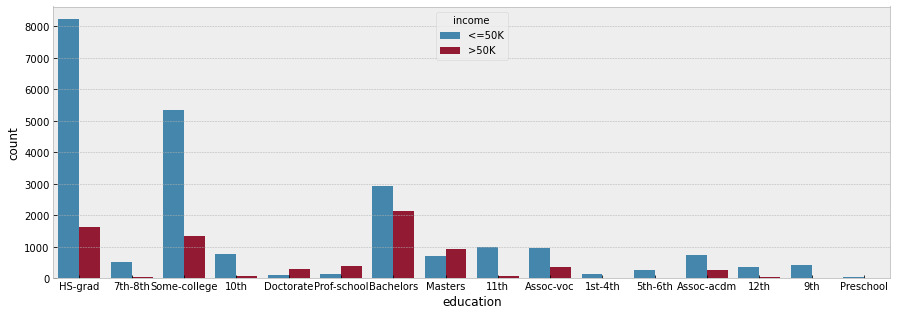

In [ ]:
# 3-3 Education에 따른 소득 빈도를 막대 그래프로 그려주세요.
plt.figure(figsize=(15, 5))


sns.countplot(x='education', hue='income', data=dataset)


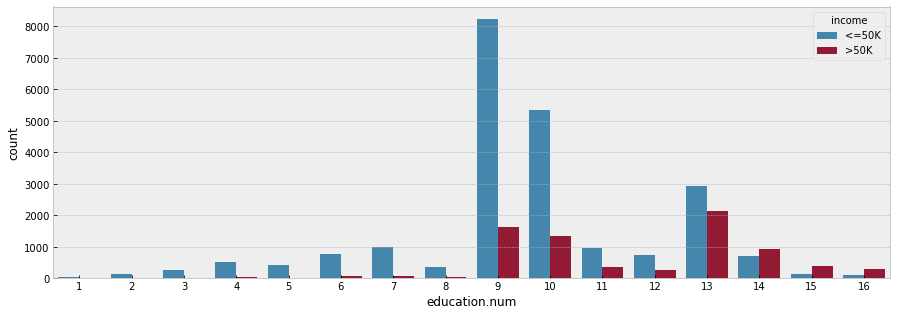

In [ ]:
# 3-4 Years of Education에 따른 소득 분포를 막대 그래프로 그려주세요.
plt.figure(figsize=(15, 5))

sns.countplot(x='education.num', hue='income', data=dataset)



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

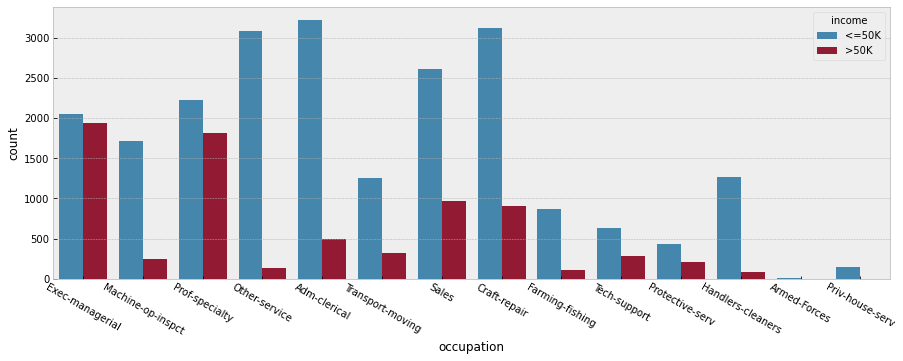

In [ ]:
# 3-5 Occupation에 따른 소득 빈도를 막대 그래프로 그려주세요.
plt.figure(figsize=(15, 5))

sns.countplot(x='occupation', hue='income', data=dataset)
plt.xticks(rotation=-30)



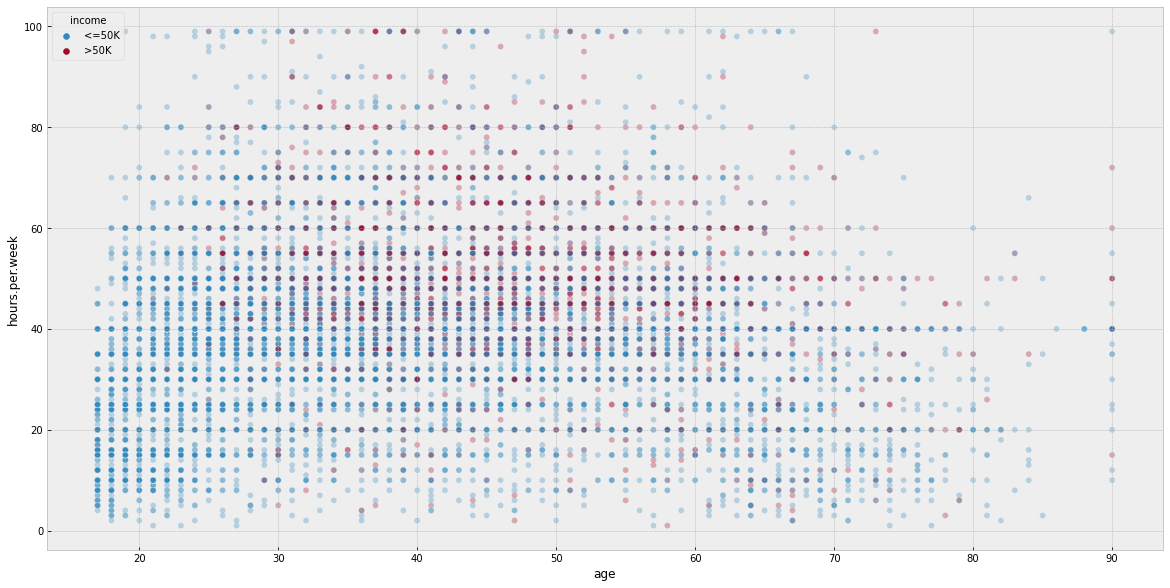

In [ ]:
# 3-6 Age와 Hours per week의 관계를 산점도로 그려주세요. (x축: Age, y축: Hours per week, alpha: 0.3)
plt.figure(figsize=(20, 10))

sns.scatterplot(x='age', y='hours.per.week', data=dataset, hue='income', alpha=0.3)



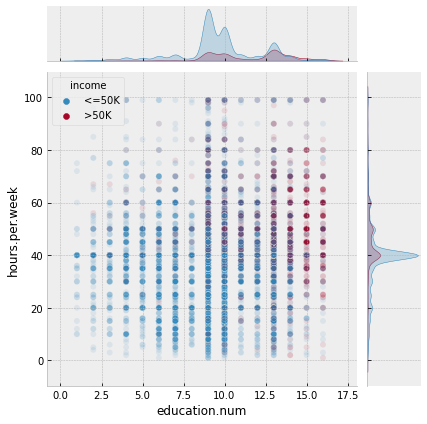

In [ ]:
# 3-7 Years of Education과 Hours per week의 관계를 Income에 따라 다른 색상으로 표현하는 jointplot로 그려주세요. (x축: Years of Education, y축: Hours per week, alpha: 0.3, hue: income)
sns.jointplot(x='education.num', y='hours.per.week', data=dataset, hue='income', joint_kws={'alpha': 0.1})


### 2.3: 다변량 분석 (Multivariate Analysis)

#### Problem 4

1) 수치형 변수들의 상관관계를 pairplot으로 그려주세요. (색상: income, 투명도: 0.3, 마커 사이즈: 3)  
2) 수치형 변수들의 상관관계를 heatmap으로 그려주세요. (color map: 'coolwarm', 주대각선 아래 요소에만 상관관계 표시)

#### Solution 4

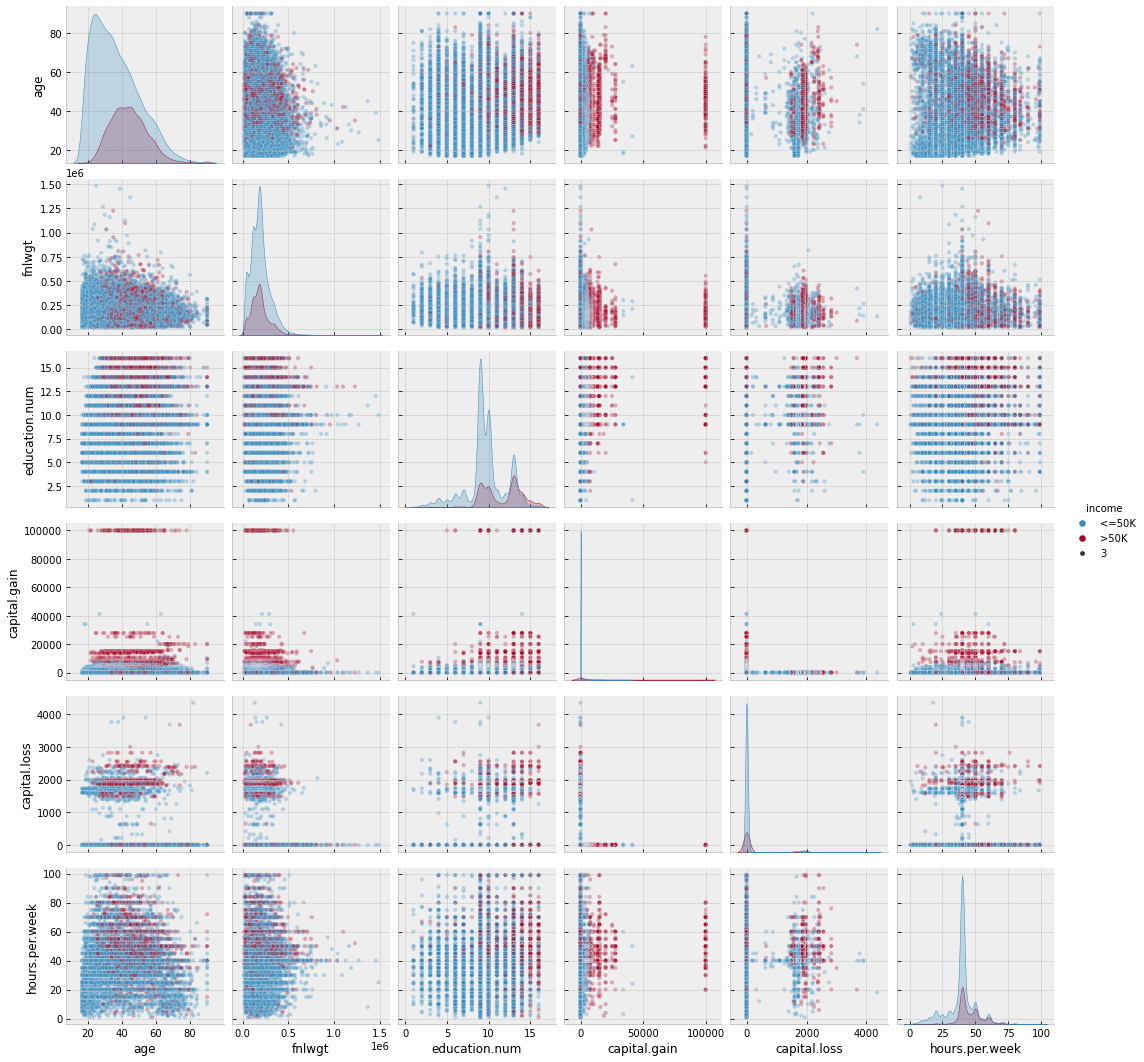

In [ ]:
# 4-1 수치형 변수들의 상관관계를 pairplot으로 그려주세요. (색상: income, 투명도: 0.3, 마커 사이즈: 3)

sns.pairplot(dataset, hue='income', plot_kws= {'alpha': 0.3, 'size': 3}) # alpha: 투명도 (transparency)
plt.show()

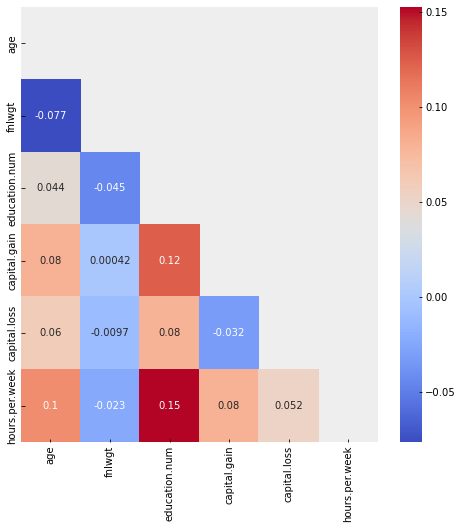

In [ ]:
# 4-2 수치형 변수들의 상관관계를 heatmap으로 그려주세요. (color map: 'coolwarm', 주대각선 아래 요소에만 상관관계 표시)

corr = dataset.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(8, 8))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm')
plt.show()

#### 관찰 내용

- 이 데이터셋에서 가장 많은 사람들은 젊고, 백인, 남성, 고등학교 졸업자이며, 9~10년의 교육을 받았으며, 주당 40시간의 근무를 함

- 상관관계 히트맵에서, 종속 변수 '소득'은 나이, 교육 연수, 자본 이득 및 주당 근무 시간과 강한 상관 관계가 있음을 알 수 있음